In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error


import warnings
warnings.filterwarnings('ignore')
# Step 1: Load the data
bike_df = pd.read_csv('day.csv')


In [2]:
print(bike_df.isnull().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [3]:
print(bike_df.duplicated().sum())

0


In [1]:
inconsistent_cnt = (bike_df['cnt'] != bike_df['casual'] + bike_df['registered']).sum()
print(f"Inconsistent 'cnt' values: {inconsistent_cnt}")


NameError: name 'bike_df' is not defined

In [5]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


<Axes: xlabel='season', ylabel='cnt'>

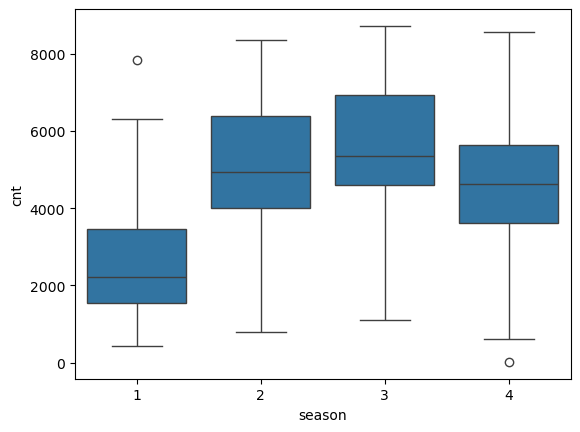

In [6]:
import seaborn as sns
sns.boxplot(x='season', y='cnt', data=bike_df)  # Bike demand by season


<Axes: xlabel='atemp', ylabel='cnt'>

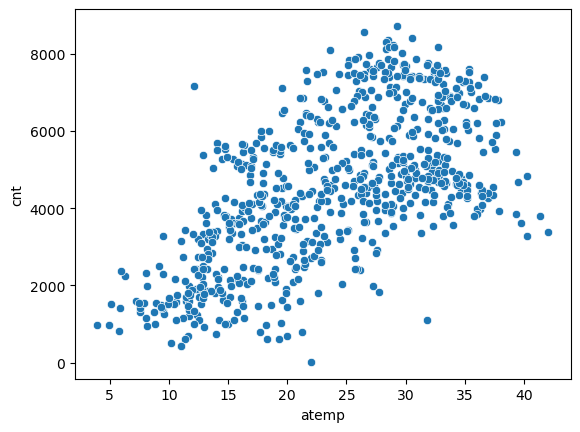

In [7]:
sns.scatterplot(x='atemp', y='cnt', data=bike_df)  # Temperature vs demand

<Axes: xlabel='temp', ylabel='cnt'>

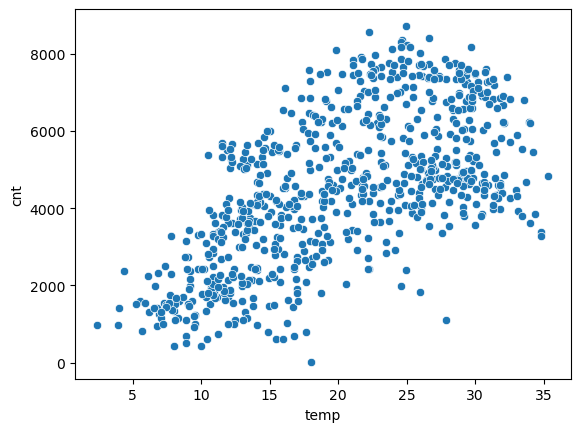

In [8]:
sns.scatterplot(x='temp', y='cnt', data=bike_df)  # Temperature vs demand

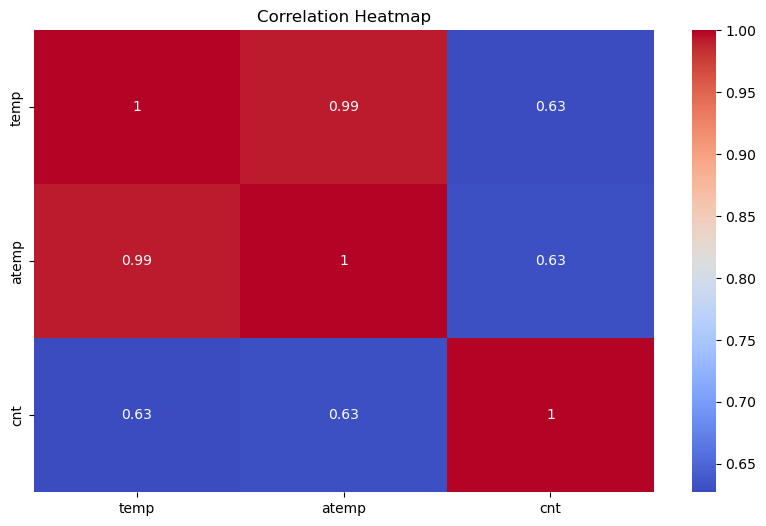

In [9]:
data = bike_df[['temp','atemp','cnt']]
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

<Axes: >

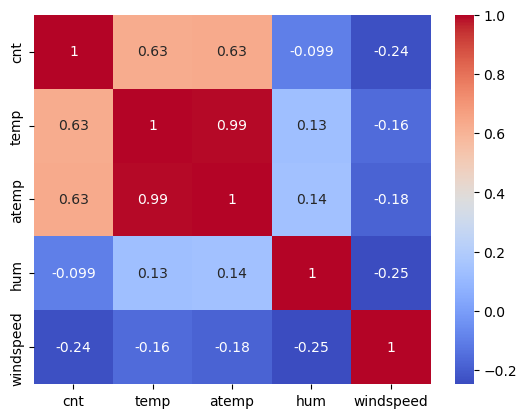

In [10]:
corr_matrix = bike_df[['cnt','temp', 'atemp', 'hum', 'windspeed']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')


In [11]:
# Create dummies for season and weathersit
bike_df = pd.get_dummies(bike_df, columns=['season', 'weathersit'], drop_first=True)


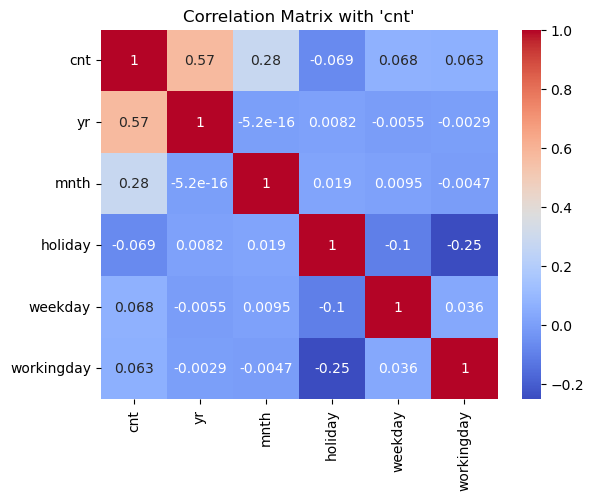

In [12]:
# Correlation matrix
corr_matrix = bike_df[['cnt','yr', 'mnth', 'holiday', 'weekday', 'workingday']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix with 'cnt'")
plt.show()


In [13]:
corr_matrix = bike_df[['cnt','yr', 'mnth', 'holiday', 'weekday', 'workingday']].corr()
corr_matrix

,cnt,yr,mnth,holiday,weekday,workingday
cnt,1.000000,5.697285e-01,2.781909e-01,-0.068764,0.067534,0.062542
yr,0.569728,1.000000e+00,-5.162656e-16,0.008195,-0.005466,-0.002945
mnth,0.278191,-5.162656e-16,1.000000e+00,0.018905,0.009523,-0.004688
holiday,-0.068764,8.195345e-03,1.890483e-02,1.000000,-0.101962,-0.252948
weekday,0.067534,-5.466369e-03,9.522969e-03,-0.101962,1.000000,0.035800
workingday,0.062542,-2.945396e-03,-4.687953e-03,-0.252948,0.035800,1.000000


In [14]:
bike_df.columns

Index(['instant', 'dteday', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt',
       'season_2', 'season_3', 'season_4', 'weathersit_2', 'weathersit_3'],
      dtype='object')

In [15]:
bike_df.head()

,instant,dteday,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,season_2,season_3,season_4,weathersit_2,weathersit_3
0,1,01-01-2018,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,331,654,985,False,False,False,True,False
1,2,02-01-2018,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,131,670,801,False,False,False,True,False
2,3,03-01-2018,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,False,False,False,False,False
3,4,04-01-2018,0,1,0,2,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,False,False,False,False,False
4,5,05-01-2018,0,1,0,3,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,False,False,False,False,False


In [16]:
bike_df.rename(columns={
    'season_2': 'season_summer',
    'season_3': 'season_fall',
    'season_4': 'season_winter'
}, inplace=True)


In [17]:
bike_df.rename(columns={
    'weathersit_2': 'weathersit_mist',
    'weathersit_3': 'weathersit_light_rain_snow'
}, inplace=True)

In [18]:
bike_df.head()

,instant,dteday,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,season_summer,season_fall,season_winter,weathersit_mist,weathersit_light_rain_snow
0,1,01-01-2018,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,331,654,985,False,False,False,True,False
1,2,02-01-2018,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,131,670,801,False,False,False,True,False
2,3,03-01-2018,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,False,False,False,False,False
3,4,04-01-2018,0,1,0,2,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,False,False,False,False,False
4,5,05-01-2018,0,1,0,3,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,False,False,False,False,False


In [19]:
bike_df[['season_summer', 'season_fall', 'season_winter', 'weathersit_mist', 'weathersit_light_rain_snow']] = \
bike_df[['season_summer', 'season_fall', 'season_winter', 'weathersit_mist', 'weathersit_light_rain_snow']].astype(int)

In [20]:
bike_df.head(10)

,instant,dteday,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,season_summer,season_fall,season_winter,weathersit_mist,weathersit_light_rain_snow
0,1,01-01-2018,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,331,654,985,0,0,0,1,0
1,2,02-01-2018,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,131,670,801,0,0,0,1,0
2,3,03-01-2018,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0,0,0,0,0
3,4,04-01-2018,0,1,0,2,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0,0,0,0,0
4,5,05-01-2018,0,1,0,3,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0,0,0,0,0
5,6,06-01-2018,0,1,0,4,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606,0,0,0,0,0
6,7,07-01-2018,0,1,0,5,1,8.057402,10.44195,49.8696,11.304642,148,1362,1510,0,0,0,1,0
7,8,08-01-2018,0,1,0,6,0,6.765000,8.11270,53.5833,17.875868,68,891,959,0,0,0,1,0
8,9,09-01-2018,0,1,0,0,0,5.671653,5.80875,43.4167,24.250650,54,768,822,0,0,0,0,0
9,10,10-01-2018,0,1,0,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321,0,0,0,0,0


- we can simplify the weekday column by extracting only the weekends (Saturday and Sunday) and assigning them a separate indicator. This way, instead of keeping the full 0–6 weekday range, we can reduce it to a binary indicator for weekends vs. weekdays. This could potentially enhance the workingday feature, as weekends are automatically handled by that.

In [22]:
# Step 1: Create a new column 'is_weekend' based on 'weekday'
bike_df['is_weekend'] = bike_df['weekday'].apply(lambda x: 1 if x == 0 or x == 6 else 0)

# Step 2: Update 'workingday' for weekends (set workingday to 0 for weekends)
bike_df['workingday'] = bike_df.apply(lambda row: 0 if row['is_weekend'] == 1 else row['workingday'], axis=1)

# Step 3: Drop the 'weekday' column as it's no longer needed
bike_df = bike_df.drop(['weekday'], axis=1)


In [23]:
bike_df.head(10)

,instant,dteday,yr,mnth,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,season_summer,season_fall,season_winter,weathersit_mist,weathersit_light_rain_snow,is_weekend
0,1,01-01-2018,0,1,0,0,14.110847,18.18125,80.5833,10.749882,331,654,985,0,0,0,1,0,1
1,2,02-01-2018,0,1,0,0,14.902598,17.68695,69.6087,16.652113,131,670,801,0,0,0,1,0,1
2,3,03-01-2018,0,1,0,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0,0,0,0,0,0
3,4,04-01-2018,0,1,0,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0,0,0,0,0,0
4,5,05-01-2018,0,1,0,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0,0,0,0,0,0
5,6,06-01-2018,0,1,0,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606,0,0,0,0,0,0
6,7,07-01-2018,0,1,0,1,8.057402,10.44195,49.8696,11.304642,148,1362,1510,0,0,0,1,0,0
7,8,08-01-2018,0,1,0,0,6.765000,8.11270,53.5833,17.875868,68,891,959,0,0,0,1,0,1
8,9,09-01-2018,0,1,0,0,5.671653,5.80875,43.4167,24.250650,54,768,822,0,0,0,0,0,1
9,10,10-01-2018,0,1,0,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321,0,0,0,0,0,0


In [24]:
df_train, df_test = train_test_split(bike_df, train_size=0.7, random_state=100)

# Drop unnecessary columns from train and test datasets
df_train = df_train.drop(columns=['instant', 'dteday', 'casual', 'registered','atemp'])
df_test = df_test.drop(columns=['instant', 'dteday', 'casual', 'registered','atemp'])

print(df_train.shape)
print(df_test.shape)

(510, 14)
(220, 14)


In [25]:
# Move 'cnt' to the first position in df_train as it is target var
df_train = df_train[['cnt'] + [col for col in df_train.columns if col != 'cnt']]

# Move 'cnt' to the first position in df_test as it is target var
df_test = df_test[['cnt'] + [col for col in df_test.columns if col != 'cnt']]

In [26]:
# Rescaling the data
scaler = MinMaxScaler()
# create a list of numeric vars
num_vars  = ['temp','hum','windspeed','cnt']
# Fit on data
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,cnt,yr,mnth,holiday,workingday,temp,hum,windspeed,season_summer,season_fall,season_winter,weathersit_mist,weathersit_light_rain_snow,is_weekend
576,0.827658,1,7,0,1,0.815169,0.725633,0.264686,0,1,0,0,0,0
426,0.465255,1,3,0,0,0.442393,0.640189,0.255342,0,0,0,1,0,1
728,0.204096,1,12,0,0,0.245101,0.498067,0.663106,0,0,0,0,0,1
482,0.482973,1,4,0,0,0.395666,0.504508,0.188475,1,0,0,1,0,1
111,0.191095,0,4,0,1,0.345824,0.751824,0.380981,1,0,0,1,0,0


In [27]:
df_train[num_vars].describe()

,temp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000
mean,0.537440,0.650480,0.320883,0.513499
std,0.225858,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.538643,0.199179,0.356420
50%,0.542596,0.653714,0.296763,0.518638
75%,0.735215,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000


In [28]:
bike_df[['mnth', 'cnt']].corr()

,mnth,cnt
mnth,1.000000,0.278191
cnt,0.278191,1.000000


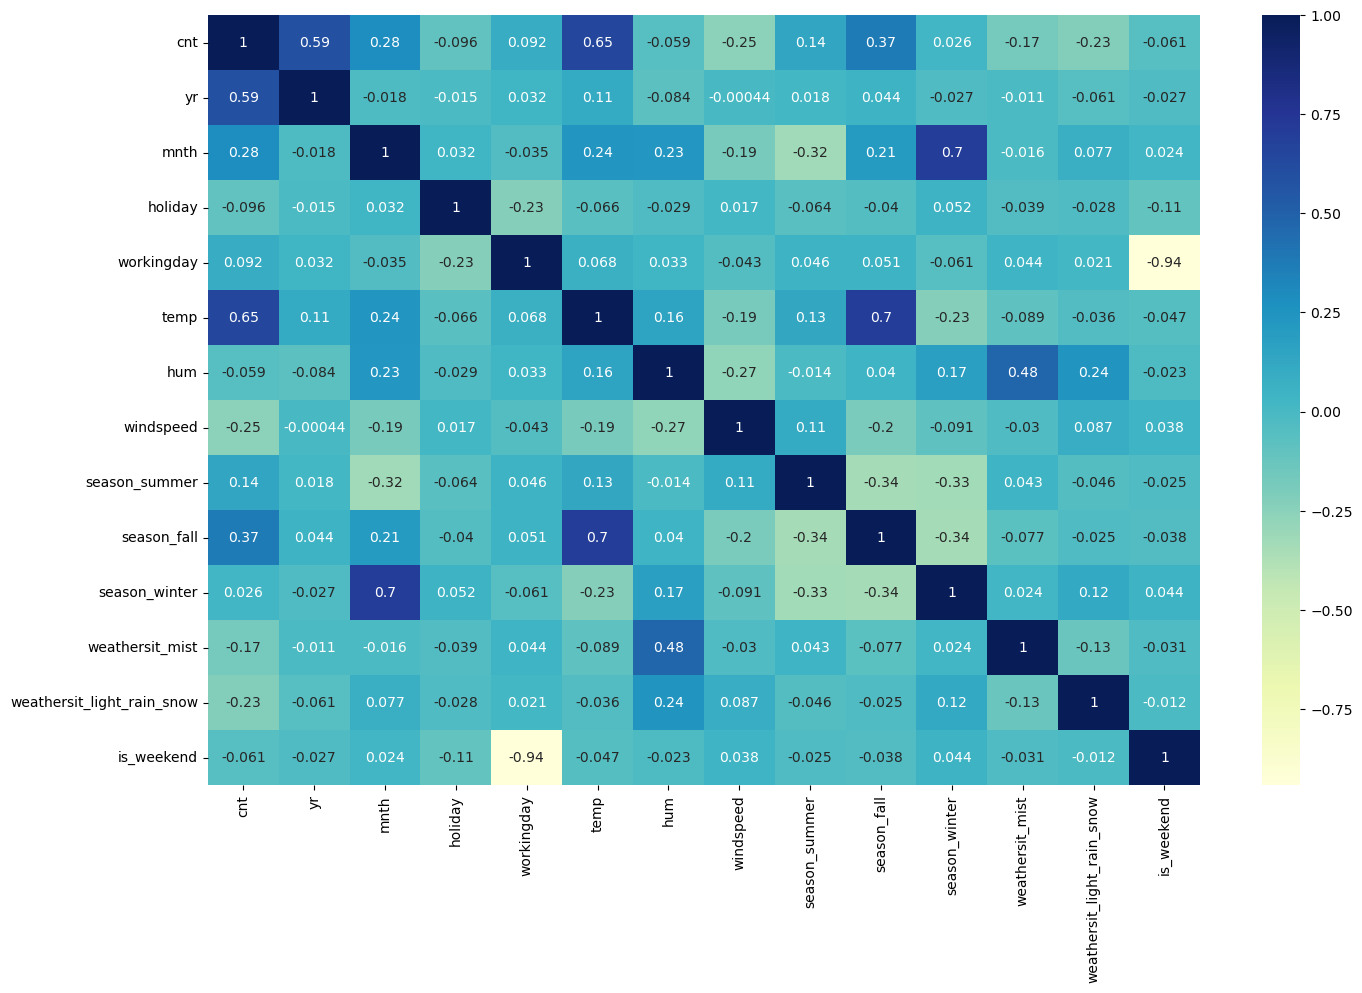

In [29]:
# heatmap 
plt.figure(figsize= (16,10))
sns.heatmap(df_train.corr(), annot= True, cmap='YlGnBu')
plt.show()

In [30]:
# X_train, y_train
y_train = df_train.pop("cnt")
X_train = df_train

In [31]:
X_train.head()

,yr,mnth,holiday,workingday,temp,hum,windspeed,season_summer,season_fall,season_winter,weathersit_mist,weathersit_light_rain_snow,is_weekend
576,1,7,0,1,0.815169,0.725633,0.264686,0,1,0,0,0,0
426,1,3,0,0,0.442393,0.640189,0.255342,0,0,0,1,0,1
728,1,12,0,0,0.245101,0.498067,0.663106,0,0,0,0,0,1
482,1,4,0,0,0.395666,0.504508,0.188475,1,0,0,1,0,1
111,0,4,0,1,0.345824,0.751824,0.380981,1,0,0,1,0,0


In [32]:
y_train.head()

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: cnt, dtype: float64

In [33]:
# Add a constant to the feature set for the intercept term
X_train_sm = sm.add_constant(X_train)

# create model 
bike_mlr = sm.OLS(y_train, X_train_sm)

# fit
bike_mlr_model = bike_mlr.fit()

# params
bike_mlr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     199.7
Date:                Sat, 21 Dec 2024   Prob (F-statistic):          2.46e-181
Time:                        00:47:43   Log-Likelihood:                 488.13
No. Observations:                 510   AIC:                            -950.3
Df Residuals:                     497   BIC:                            -895.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.1375      0.022      6.230      0.000       0.094       0.181
yr                             0.2306      0.008     27.189      0.000       0.214       0.247
mnth                           0.0019      0.002      0.790      0.430      -0.003       0.007
holiday                       -0.0101      0.021     -0.479      0.632      -0.051       0.031
workingday                     0.0826      0.011      7.830      0.000       0.062       0.103
temp                           0.4937      0.035     14.267      0.000       0.426       0.562
hum                           -0.1425      0.039     -3.633      0.000      -0.220      -0.065
windspeed                     -0.1814      0.027     -6.752      0.000      -0.234      -0.129
season_summer                  0.1149      0.016      7.275      0.000       0.084       0.146
season_fall                    0.0663      0.023      2.856      0.004       0.021       0.112
season_winter                  0.1483      0.022      6.625      0.000       0.104       0.192
weathersit_mist               -0.0526      0.011     -4.799      0.000      -0.074      -0.031
weathersit_light_rain_snow    -0.2402      0.028     -8.724      0.000      -0.294      -0.186
is_weekend                     0.0650      0.011      5.772      0.000       0.043       0.087
==============================================================================
Omnibus:                       59.360   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.426
Skew:                          -0.571   Prob(JB):                     8.85e-36
Kurtosis:                       5.508   Cond. No.                     4.66e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.34e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [34]:
# significance (p-values)
# VIF
vif = pd.DataFrame()
vif["Feature"] = X_train.columns
vif["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif["VIF"] = round(vif['VIF'],2)
vif = vif.sort_values(by= 'VIF', ascending=False)
vif

,Feature,VIF
3,workingday,31.45
12,is_weekend,14.45
8,season_fall,6.01
9,season_winter,5.37
1,mnth,3.88
4,temp,3.51
7,season_summer,2.67
2,holiday,2.15
5,hum,1.88
10,weathersit_mist,1.56


In [36]:
X = X_train.drop('holiday', axis=1)

In [38]:
# create another model 
# Add a constant to the feature set for the intercept term
X_train_sm = sm.add_constant(X)

# create model 
bike_mlr = sm.OLS(y_train, X_train_sm)

# fit
bike_mlr_model = bike_mlr.fit()

# params
bike_mlr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     199.7
Date:                Sat, 21 Dec 2024   Prob (F-statistic):          2.46e-181
Time:                        00:48:20   Log-Likelihood:                 488.13
No. Observations:                 510   AIC:                            -950.3
Df Residuals:                     497   BIC:                            -895.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.1275      0.038      3.330      0.001       0.052       0.203
yr                             0.2306      0.008     27.189      0.000       0.214       0.247
mnth                           0.0019      0.002      0.790      0.430      -0.003       0.007
workingday                     0.0926      0.027      3.455      0.001       0.040       0.145
temp                           0.4937      0.035     14.267      0.000       0.426       0.562
hum                           -0.1425      0.039     -3.633      0.000      -0.220      -0.065
windspeed                     -0.1814      0.027     -6.752      0.000      -0.234      -0.129
season_summer                  0.1149      0.016      7.275      0.000       0.084       0.146
season_fall                    0.0663      0.023      2.856      0.004       0.021       0.112
season_winter                  0.1483      0.022      6.625      0.000       0.104       0.192
weathersit_mist               -0.0526      0.011     -4.799      0.000      -0.074      -0.031
weathersit_light_rain_snow    -0.2402      0.028     -8.724      0.000      -0.294      -0.186
is_weekend                     0.0751      0.027      2.748      0.006       0.021       0.129
==============================================================================
Omnibus:                       59.360   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.426
Skew:                          -0.571   Prob(JB):                     8.85e-36
Kurtosis:                       5.508   Cond. No.                         99.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
# VIF
vif = pd.DataFrame()
vif["Feature"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["VIF"] = round(vif['VIF'],2)
vif = vif.sort_values(by= 'VIF', ascending=False)
vif

,Feature,VIF
4,hum,26.75
3,temp,23.15
1,mnth,17.35
2,workingday,15.40
7,season_fall,8.07
11,is_weekend,7.32
8,season_winter,7.06
5,windspeed,4.45
6,season_summer,3.53
9,weathersit_mist,2.23


In [42]:
X = X.drop('mnth', axis=1)

In [44]:
# create another model 
# Add a constant to the feature set for the intercept term
X_train_sm = sm.add_constant(X)

# create model 
bike_mlr = sm.OLS(y_train, X_train_sm)

# fit
bike_mlr_model = bike_mlr.fit()

# params
bike_mlr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     218.0
Date:                Sat, 21 Dec 2024   Prob (F-statistic):          2.22e-182
Time:                        00:48:28   Log-Likelihood:                 487.81
No. Observations:                 510   AIC:                            -951.6
Df Residuals:                     498   BIC:                            -900.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.1319      0.038      3.483      0.001       0.057       0.206
yr                             0.2303      0.008     27.190      0.000       0.214       0.247
workingday                     0.0918      0.027      3.428      0.001       0.039       0.144
temp                           0.4949      0.035     14.320      0.000       0.427       0.563
hum                           -0.1398      0.039     -3.579      0.000      -0.217      -0.063
windspeed                     -0.1810      0.027     -6.739      0.000      -0.234      -0.128
season_summer                  0.1176      0.015      7.626      0.000       0.087       0.148
season_fall                    0.0746      0.021      3.604      0.000       0.034       0.115
season_winter                  0.1626      0.013     12.329      0.000       0.137       0.189
weathersit_mist               -0.0530      0.011     -4.845      0.000      -0.075      -0.032
weathersit_light_rain_snow    -0.2413      0.027     -8.782      0.000      -0.295      -0.187
is_weekend                     0.0744      0.027      2.725      0.007       0.021       0.128
==============================================================================
Omnibus:                       59.476   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              162.267
Skew:                          -0.571   Prob(JB):                     5.81e-36
Kurtosis:                       5.516   Cond. No.                         22.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
vif = pd.DataFrame()
vif["Feature"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["VIF"] = round(vif['VIF'],2)
vif = vif.sort_values(by= 'VIF', ascending=False)
vif

,Feature,VIF
3,hum,25.58
2,temp,23.07
1,workingday,15.30
10,is_weekend,7.26
6,season_fall,6.48
4,windspeed,4.41
5,season_summer,3.37
7,season_winter,2.47
8,weathersit_mist,2.21
0,yr,2.06


In [53]:
X = X.drop('hum', axis=1)

In [55]:
# create another model 
# Add a constant to the feature set for the intercept term
X_train_sm = sm.add_constant(X)

# create model 
bike_mlr = sm.OLS(y_train, X_train_sm)

# fit
bike_mlr_model = bike_mlr.fit()

# params
bike_mlr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     233.0
Date:                Sat, 21 Dec 2024   Prob (F-statistic):          7.72e-181
Time:                        00:59:33   Log-Likelihood:                 481.33
No. Observations:                 510   AIC:                            -940.7
Df Residuals:                     499   BIC:                            -894.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.0523      0.031      1.686      0.092      -0.009       0.113
yr                             0.2337      0.009     27.435      0.000       0.217       0.250
workingday                     0.0931      0.027      3.437      0.001       0.040       0.146
temp                           0.4653      0.034     13.705      0.000       0.399       0.532
windspeed                     -0.1527      0.026     -5.881      0.000      -0.204      -0.102
season_summer                  0.1204      0.016      7.731      0.000       0.090       0.151
season_fall                    0.0824      0.021      3.955      0.000       0.041       0.123
season_winter                  0.1579      0.013     11.893      0.000       0.132       0.184
weathersit_mist               -0.0757      0.009     -8.386      0.000      -0.093      -0.058
weathersit_light_rain_snow    -0.2800      0.026    -10.957      0.000      -0.330      -0.230
is_weekend                     0.0754      0.028      2.729      0.007       0.021       0.130
==============================================================================
Omnibus:                       58.110   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              156.086
Skew:                          -0.563   Prob(JB):                     1.28e-34
Kurtosis:                       5.466   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
vif = pd.DataFrame()
vif["Feature"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["VIF"] = round(vif['VIF'],2)
vif = vif.sort_values(by= 'VIF', ascending=False)
vif

,Feature,VIF
2,temp,19.70
1,workingday,9.10
5,season_fall,6.30
9,is_weekend,4.50
3,windspeed,4.40
4,season_summer,3.34
6,season_winter,2.42
0,yr,2.06
7,weathersit_mist,1.56
8,weathersit_light_rain_snow,1.08


In [59]:
X = X.drop('workingday', axis=1)

In [61]:
# create another model 
# Add a constant to the feature set for the intercept term
X_train_sm = sm.add_constant(X)

# create model 
bike_mlr = sm.OLS(y_train, X_train_sm)

# fit
bike_mlr_model = bike_mlr.fit()

# params
bike_mlr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     252.1
Date:                Sat, 21 Dec 2024   Prob (F-statistic):          1.59e-179
Time:                        01:01:01   Log-Likelihood:                 475.37
No. Observations:                 510   AIC:                            -930.7
Df Residuals:                     500   BIC:                            -888.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.1398      0.018      7.816      0.000       0.105       0.175
yr                             0.2341      0.009     27.196      0.000       0.217       0.251
temp                           0.4671      0.034     13.614      0.000       0.400       0.535
windspeed                     -0.1545      0.026     -5.886      0.000      -0.206      -0.103
season_summer                  0.1229      0.016      7.817      0.000       0.092       0.154
season_fall                    0.0839      0.021      3.984      0.000       0.043       0.125
season_winter                  0.1573      0.013     11.721      0.000       0.131       0.184
weathersit_mist               -0.0741      0.009     -8.134      0.000      -0.092      -0.056
weathersit_light_rain_snow    -0.2760      0.026    -10.696      0.000      -0.327      -0.225
is_weekend                    -0.0141      0.009     -1.505      0.133      -0.032       0.004
==============================================================================
Omnibus:                       67.328   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              189.837
Skew:                          -0.637   Prob(JB):                     5.99e-42
Kurtosis:                       5.703   Cond. No.                         14.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
vif = pd.DataFrame()
vif["Feature"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["VIF"] = round(vif['VIF'],2)
vif = vif.sort_values(by= 'VIF', ascending=False)
vif

,Feature,VIF
1,temp,14.27
4,season_fall,6.15
2,windspeed,3.33
3,season_summer,3.33
5,season_winter,2.38
0,yr,2.02
6,weathersit_mist,1.47
8,is_weekend,1.40
7,weathersit_light_rain_snow,1.08


In [65]:
X = X.drop('temp', axis=1)

In [67]:
# create another model 
# Add a constant to the feature set for the intercept term
X_train_sm = sm.add_constant(X)

# create model 
bike_mlr = sm.OLS(y_train, X_train_sm)

# fit
bike_mlr_model = bike_mlr.fit()

# params
bike_mlr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     190.4
Date:                Sat, 21 Dec 2024   Prob (F-statistic):          1.42e-146
Time:                        01:03:14   Log-Likelihood:                 394.96
No. Observations:                 510   AIC:                            -771.9
Df Residuals:                     501   BIC:                            -733.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.2842      0.017     16.885      0.000       0.251       0.317
yr                             0.2469      0.010     24.678      0.000       0.227       0.267
windspeed                     -0.1753      0.031     -5.720      0.000      -0.235      -0.115
season_summer                  0.2580      0.014     18.088      0.000       0.230       0.286
season_fall                    0.3158      0.014     21.821      0.000       0.287       0.344
season_winter                  0.2259      0.015     15.525      0.000       0.197       0.254
weathersit_mist               -0.0848      0.011     -7.987      0.000      -0.106      -0.064
weathersit_light_rain_snow    -0.2878      0.030     -9.539      0.000      -0.347      -0.228
is_weekend                    -0.0157      0.011     -1.436      0.152      -0.037       0.006
==============================================================================
Omnibus:                       32.721   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               82.294
Skew:                          -0.300   Prob(JB):                     1.35e-18
Kurtosis:                       4.874   Cond. No.                         9.33
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [69]:
vif = pd.DataFrame()
vif["Feature"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["VIF"] = round(vif['VIF'],2)
vif = vif.sort_values(by= 'VIF', ascending=False)
vif

,Feature,VIF
1,windspeed,2.71
0,yr,1.88
2,season_summer,1.62
4,season_winter,1.53
3,season_fall,1.46
5,weathersit_mist,1.46
7,is_weekend,1.38
6,weathersit_light_rain_snow,1.08


In [71]:
X = X.drop('is_weekend', axis=1)

In [75]:
# create another model 
# Add a constant to the feature set for the intercept term
X_train_sm = sm.add_constant(X)

# create model 
bike_mlr = sm.OLS(y_train, X_train_sm)

# fit
bike_mlr_model = bike_mlr.fit()

# params
bike_mlr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     216.8
Date:                Sat, 21 Dec 2024   Prob (F-statistic):          2.59e-147
Time:                        01:04:36   Log-Likelihood:                 393.92
No. Observations:                 510   AIC:                            -771.8
Df Residuals:                     502   BIC:                            -738.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.2795      0.017     16.913      0.000       0.247       0.312
yr                             0.2473      0.010     24.699      0.000       0.228       0.267
windspeed                     -0.1769      0.031     -5.771      0.000      -0.237      -0.117
season_summer                  0.2585      0.014     18.111      0.000       0.231       0.287
season_fall                    0.3163      0.014     21.843      0.000       0.288       0.345
season_winter                  0.2254      0.015     15.479      0.000       0.197       0.254
weathersit_mist               -0.0843      0.011     -7.933      0.000      -0.105      -0.063
weathersit_light_rain_snow    -0.2866      0.030     -9.494      0.000      -0.346      -0.227
==============================================================================
Omnibus:                       33.201   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               76.070
Skew:                          -0.342   Prob(JB):                     3.03e-17
Kurtosis:                       4.764   Cond. No.                         9.09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [77]:
vif = pd.DataFrame()
vif["Feature"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["VIF"] = round(vif['VIF'],2)
vif = vif.sort_values(by= 'VIF', ascending=False)
vif

,Feature,VIF
1,windspeed,2.56
0,yr,1.88
2,season_summer,1.61
4,season_winter,1.49
5,weathersit_mist,1.46
3,season_fall,1.45
6,weathersit_light_rain_snow,1.08


### Residual Analysis


In [80]:
y_train_pred = bike_mlr_model.predict(X_train_sm)
y_train_pred

576    0.796325
426    0.397383
728    0.409526
482    0.667761
111    0.386380
         ...   
578    0.810042
53     0.259788
350    0.344234
79     0.360042
520    0.637492
Length: 510, dtype: float64

<Axes: ylabel='Density'>

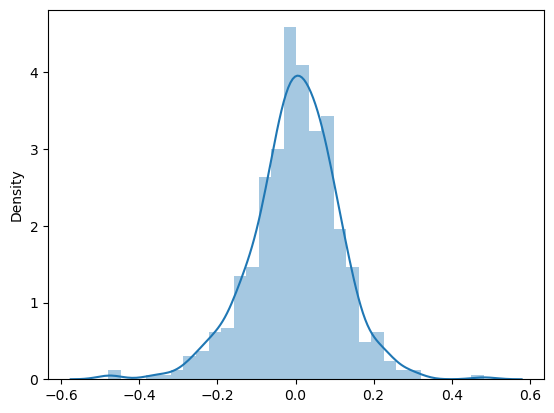

In [82]:
res = y_train - y_train_pred
sns.distplot(res)

### Predication and Evaluation on Test Set

In [86]:
# create a list of numeric vars
num_vars  = ['temp','hum','windspeed','cnt']
# Fit on test data
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,cnt,yr,mnth,holiday,workingday,temp,hum,windspeed,season_summer,season_fall,season_winter,weathersit_mist,weathersit_light_rain_snow,is_weekend
184,0.692706,0,7,1,0,0.831783,0.657364,0.084219,0,1,0,1,0,0
535,0.712034,1,6,0,1,0.901354,0.610133,0.153728,1,0,0,0,0,0
299,0.303382,0,10,0,1,0.511964,0.837699,0.334206,0,0,1,1,0,0
221,0.547400,0,8,0,1,0.881625,0.437098,0.339570,0,1,0,0,0,0
152,0.569029,0,6,0,1,0.817246,0.314298,0.537414,1,0,0,0,0,0


In [88]:
df_test.describe()

,cnt,yr,mnth,holiday,workingday,temp,hum,windspeed,season_summer,season_fall,season_winter,weathersit_mist,weathersit_light_rain_snow,is_weekend
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.522154,0.481818,6.490909,0.036364,0.700000,0.558718,0.638221,0.313293,0.263636,0.245455,0.236364,0.318182,0.027273,0.263636
std,0.219163,0.500809,3.422316,0.187620,0.459303,0.233187,0.148694,0.159584,0.441609,0.431338,0.425817,0.466833,0.163248,0.441609
min,0.048205,0.000000,1.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.378595,0.000000,4.000000,0.000000,0.000000,0.355429,0.529197,0.198843,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.524678,0.000000,6.000000,0.000000,1.000000,0.558172,0.625590,0.300126,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.677750,1.000000,9.000000,0.000000,1.000000,0.755981,0.743798,0.402718,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,0.963300,1.000000,12.000000,1.000000,1.000000,0.984424,1.002146,0.807474,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [90]:
y_test = df_test.pop('cnt')
X_test = df_test

In [92]:
# add constant 
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,yr,mnth,holiday,workingday,temp,hum,windspeed,season_summer,season_fall,season_winter,weathersit_mist,weathersit_light_rain_snow,is_weekend
184,1.0,0,7,1,0,0.831783,0.657364,0.084219,0,1,0,1,0,0
535,1.0,1,6,0,1,0.901354,0.610133,0.153728,1,0,0,0,0,0
299,1.0,0,10,0,1,0.511964,0.837699,0.334206,0,0,1,1,0,0
221,1.0,0,8,0,1,0.881625,0.437098,0.339570,0,1,0,0,0,0
152,1.0,0,6,0,1,0.817246,0.314298,0.537414,1,0,0,0,0,0


In [98]:
X_test_sm = X_test_sm.drop(['holiday','mnth','hum','workingday','temp','is_weekend'], axis=1)

In [100]:
# predict 
y_test_pred = bike_mlr_model.predict(X_test_sm)

In [104]:
# evaluate the model 
r2_score(y_true= y_test, y_pred= y_test_pred)

0.7358414502561951

{'Train MAE': 0.08410169022874762, 'Test MAE': 0.08852584847679536, 'Train RMSE': 0.11176856326764245, 'Test RMSE': 0.11238572298889564}


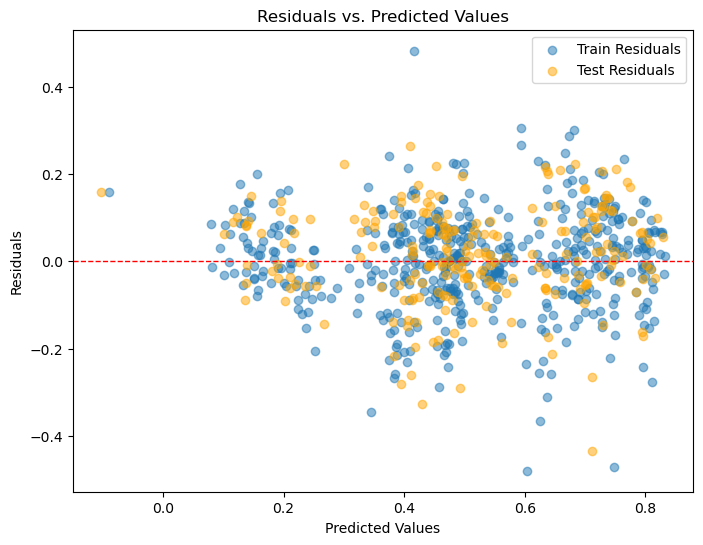

In [133]:
# Calculate Additional Metrics:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Predictions on train and test sets
y_train_pred = bike_mlr_model.predict(X_train_sm)
y_test_pred = bike_mlr_model.predict(X_test_sm)


# Calculate metrics
metrics = {
    "Train MAE": mean_absolute_error(y_train, y_train_pred),
    "Test MAE": mean_absolute_error(y_test, y_test_pred),
    "Train RMSE": mean_squared_error(y_train, y_train_pred, squared=False),
    "Test RMSE": mean_squared_error(y_test, y_test_pred, squared=False),    
}

print(metrics)

# Residual Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_train_pred, y_train - y_train_pred, label="Train Residuals", alpha=0.5)
plt.scatter(y_test_pred, y_test - y_test_pred, label="Test Residuals", alpha=0.5, color='orange')
plt.axhline(0, color="red", linestyle="--", linewidth=1)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted Values")
plt.legend()
plt.show()


__So the best fitted line equation for 'cnt' is:__

#### **cnt**=0.2795 + 0.2473 x *yr* − 0.1769 x *windspeed* + 0.2585 x *season_summer* + 0.3163 x *season_fall* + 0.2254 x *season_winter* − 0.0843 x *weathersit_mist* − 0.2866 x *weathersit_light_rain_snow*
